# Linear regression

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Association-between-two-random-variables" data-toc-modified-id="Association-between-two-random-variables-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Association between two random variables</a></span><ul class="toc-item"><li><span><a href="#Covariance-matrix" data-toc-modified-id="Covariance-matrix-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Covariance matrix</a></span></li><li><span><a href="#Correlation-matrix" data-toc-modified-id="Correlation-matrix-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Correlation matrix</a></span></li><li><span><a href="#Scatter-plot" data-toc-modified-id="Scatter-plot-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Scatter plot</a></span></li><li><span><a href="#Observe-the-association-between-LSTAT-and-MEDV" data-toc-modified-id="Observe-the-association-between-LSTAT-and-MEDV-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Observe the association between LSTAT and MEDV</a></span></li></ul></li><li><span><a href="#Simple-linear-regression-model" data-toc-modified-id="Simple-linear-regression-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Simple linear regression model</a></span><ul class="toc-item"><li><span><a href="#Housing-example:-Association-between-RM-and-MEDV" data-toc-modified-id="Housing-example:-Association-between-RM-and-MEDV-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Housing example: Association between RM and MEDV</a></span></li><li><span><a href="#Least-sqaure-estimates" data-toc-modified-id="Least-sqaure-estimates-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Least sqaure estimates</a></span></li><li><span><a href="#Regression-summary-table" data-toc-modified-id="Regression-summary-table-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Regression summary table</a></span></li></ul></li><li><span><a href="#Diagnostic-of-models" data-toc-modified-id="Diagnostic-of-models-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Diagnostic of models</a></span><ul class="toc-item"><li><span><a href="#Linearity" data-toc-modified-id="Linearity-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Linearity</a></span></li><li><span><a href="#Independence" data-toc-modified-id="Independence-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Independence</a></span></li><li><span><a href="#Normality" data-toc-modified-id="Normality-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Normality</a></span></li><li><span><a href="#Equal-variance" data-toc-modified-id="Equal-variance-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Equal variance</a></span></li></ul></li></ul></div>

## Association between two random variables

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import the housing information for analysis 

housing = pd.read_csv('data/linear_regression_diagnostics/housing.csv', index_col=0) 
housing.head()

,LSTAT,INDUS,NOX,RM,MEDV
0,4.98,2.31,0.538,6.575,24.0
1,9.14,7.07,0.469,6.421,21.6
2,4.03,7.07,0.469,7.185,34.7
3,2.94,2.18,0.458,6.998,33.4
4,5.33,2.18,0.458,7.147,36.2


**DATA DESCRIPTION**

Here's an example of housing price. This data concerns, housing values in suburbs of Boston. 

- LSTAT is the percentage of the population classified as low status. 
- INDUS is the proportion of non-retail business acres per town. 
- NOX is the nitric oxide concentrations. 
- RM is the average number of rooms per dwelling. 
- MEDV is the median value of the owner-occupied homes in $1000.

### Covariance matrix

We can use the covariance to determine the **direction** of a _linear relationship_ between two variables as follows:

- If both variables tend to increase or decrease together, the coefficient is positive.
- If one variable tends to increase as the other decreases, the coefficient is negative.

Covariance is similar to correlation but when the covariance is calculated, the data is not standardized. Therefore, the covariance is expressed in units that vary with the data and is not converted to a standardized scale of −1 to +1. **Because the data are not standardized, you cannot use the covariance statistic to assess the strength of a linear relationship.** 

In the covariance matrix in the output:
- The off-diagonal elements contain the covariances of each pair of variables. 
- The diagonal elements of the covariance matrix contain the variances of each variable. The variance measures how much the data are scattered about the mean. The variance is equal to the square of the standard deviation.

In [3]:
# Use covariance to calculate the association
housing.cov()

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,50.994760,29.580270,0.488946,-3.079741,-48.447538
INDUS,29.580270,47.064442,0.607074,-1.887957,-30.520823
NOX,0.488946,0.607074,0.013428,-0.024603,-0.455412
RM,-3.079741,-1.887957,-0.024603,0.493671,4.493446
MEDV,-48.447538,-30.520823,-0.455412,4.493446,84.586724


### Correlation matrix
To assess the strength of a relationship between two variables using a standardized scale of -1 to +1, use Correlation.

Correlation measure the **strength and direction** of the association between two variables.

Measures **linear** relationship between two continuous variables (The most common method: Pearson)

In [4]:
# Use correlation to calculate the association is more appropriate in this case
housing.corr()

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,1.000000,0.603800,0.590879,-0.613808,-0.737663
INDUS,0.603800,1.000000,0.763651,-0.391676,-0.483725
NOX,0.590879,0.763651,1.000000,-0.302188,-0.427321
RM,-0.613808,-0.391676,-0.302188,1.000000,0.695360
MEDV,-0.737663,-0.483725,-0.427321,0.695360,1.000000


### Scatter plot
Remember, correlation measures **linear** relationship. If you are not certain whether your variables are linearly related, you should create a Scatterplot. 

If the relationship between the variables is not linear, you may be able to use the Spearman rank order correlation (also known as Spearman's rho).

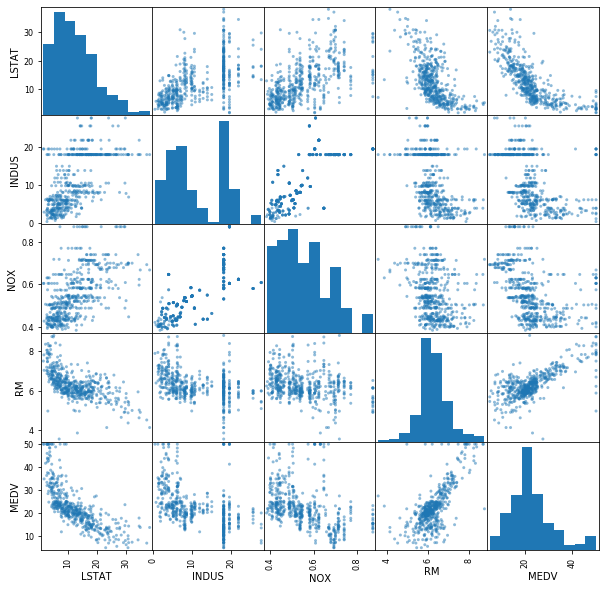

In [7]:
# scatter matrix plot
from pandas.plotting import scatter_matrix
sm = scatter_matrix(housing, figsize=(10, 10))

### Observe the association between LSTAT and MEDV

- LSTAT is the percentage of the population classified as low status. 
- MEDV is the median value of the owner-occupied homes in $1000.

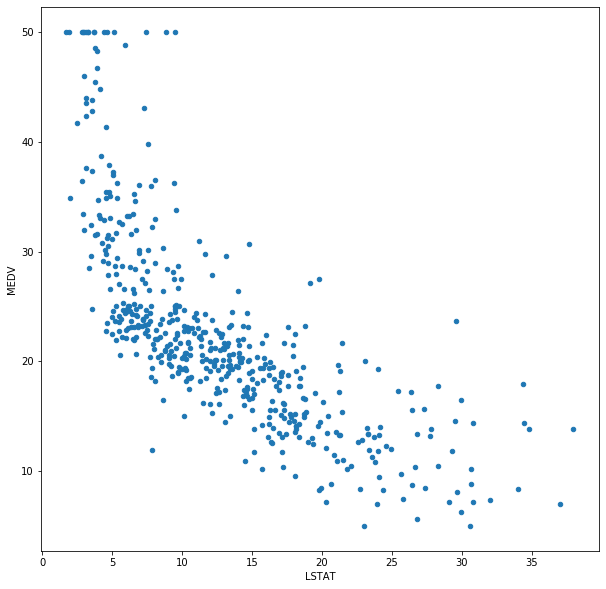

In [8]:
# This time we take a closer look at MEDV vs LSTAT。 What is the association between MEDV and LSTAT you observed?
housing.plot(kind='scatter', x='LSTAT', y='MEDV', figsize=(10, 10))

We see that as the percentage of population classified as low status within the suburb increases, the median value of owners occupied home drops.

## Simple linear regression model

Linear regression is an analysis that assesses whether one or more predictor variables explain the dependent (criterion) variable.

Example (High Frequency Trading): Estimate Price Change in next 5 seconds (**Response variable**) using Price, Volume history of last 10 minutes (**Predictor variables**)

$y_i = \beta_0 + \beta_1 \cdot x_i + \epsilon_i $

Mean equation above is a straight line. All the sample pairs goes around this line due to noise term.

Assumptions of Linear Regression Model:

1) **Linearity** (The mean of y is linearly determined by predictors)

2) **Independence** (With different X, responses are independent)

3) **Normality** (random noise and y follows normal distributions)

4) **Equal variance** (the variance of y are all equal even if the values of predictors are different)

### Housing example: Association between RM and MEDV

- RM is the average number of rooms per dwelling. 
- MEDV is the median value of the owner-occupied homes in $1000.

$MEDV = \beta_0 + \beta_1 \cdot RM$

Let's use python in estimating the values of $\beta_0$ and $\beta_1$ (intercept and slope)

In [9]:
# lets try to guess what are the real values of intercept and slope
# we call our guess b0, b1...
# Try to assign the value of b0, b1 to get a straight line that can describe our data 
b0 = 0.1
b1 = 1
housing['GuessResponse'] = b0 + b1*housing['RM']

# Also want to know the error of of guess...
# This show how far is our guess response from the true response
housing['observed_error'] = housing['MEDV'] - housing['GuessResponse']

**Minimization problem of SSE**

SSE displays the variation of a response variable that is not being explained by the model or predictor.

If SSE (sum of sqaured error) is larger, it is easy to figure out that observed pairs stay far away from your predictor equation.

Ideally, we want to get a line whose SSE or sum of squared errors is very small. Alternatively speaking, all sample pairs are close to predict line you found.

In [10]:
print('\nSum of squared error (SEE) is :', (housing['observed_error']**2).sum())


Sum of squared error (SEE) is : 170373.528047


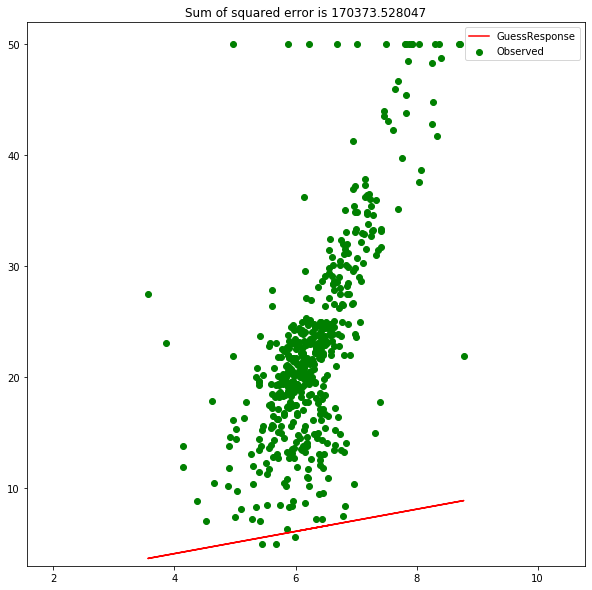

In [11]:
# plot your estimated line together with the points
plt.figure(figsize=(10, 10))
plt.title('Sum of squared error is {}'.format((((housing['observed_error'])**2)).sum()))
plt.scatter(housing['RM'], housing['MEDV'], color='g', label='Observed')
plt.plot(housing['RM'], housing['GuessResponse'], color='red', label='GuessResponse')
plt.legend()
plt.xlim(housing['RM'].min()-2, housing['RM'].max()+2)
plt.ylim(housing['MEDV'].min()-2, housing['MEDV'].max()+2)
plt.show()

We can clearly see that our guess estimates for $\beta_0$ and $\beta_1$ do not reflect the observed data.

### Least sqaure estimates

In [12]:
# Input the formula
formula = 'MEDV~RM' # Specificy: Response~Predictor
model = smf.ols(formula=formula, data=housing).fit()

# Here are estimated intercept and slope by least square estimation
# Attribute 'params' returns a list of estimated parameters form model
b0_ols = model.params[0]
b1_ols = model.params[1]

housing['BestResponse'] = b0_ols + b1_ols*housing['RM']

# Also want to know the error of of guess...
housing['error'] = housing['MEDV'] - housing['BestResponse']

print(housing.head())

   LSTAT  INDUS    NOX     RM  MEDV  GuessResponse  observed_error  \
0   4.98   2.31  0.538  6.575  24.0          6.675          17.325   
1   9.14   7.07  0.469  6.421  21.6          6.521          15.079   
2   4.03   7.07  0.469  7.185  34.7          7.285          27.415   
3   2.94   2.18  0.458  6.998  33.4          7.098          26.302   
4   5.33   2.18  0.458  7.147  36.2          7.247          28.953   

   BestResponse     error  
0     25.175746 -1.175746  
1     23.774021 -2.174021  
2     30.728032  3.971968  
3     29.025938  4.374062  
4     30.382152  5.817848  


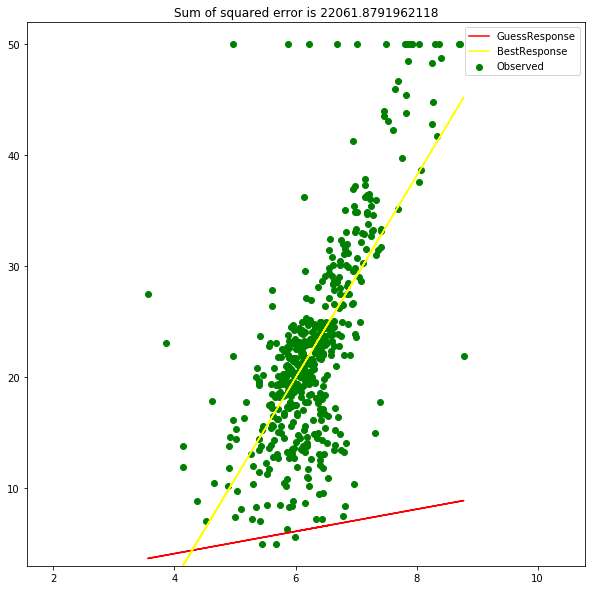

In [13]:
# plot your estimated line together with the points
plt.figure(figsize=(10, 10))
# See if the error drops after you use least square method
plt.title('Sum of squared error is {}'.format((((housing['error'])**2)).sum()))
plt.scatter(housing['RM'], housing['MEDV'], color='g', label='Observed')
plt.plot(housing['RM'], housing['GuessResponse'], color='red', label='GuessResponse')
plt.plot(housing['RM'], housing['BestResponse'], color='yellow', label='BestResponse')
plt.legend()
plt.xlim(housing['RM'].min()-2, housing['RM'].max()+2)
plt.ylim(housing['MEDV'].min()-2, housing['MEDV'].max()+2)
plt.show()

### Regression summary table

In [14]:
#Refer to the P-value of RM, Confidence Interval and R-square to evaluate the performance.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           2.49e-74
Time:                        17:45:56   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Pay attention to:**

- p value of a slope (P>|t|). This is a p value from a two tail test, where:
    - H0: beta = 0, H1: is not zero. 
    - P - probability of H0 being TRUE (given low value of p - we reject null)
    
- Estimate of $\beta_1$ is 9.1021. Estimate lays in the interval [8.279 : 9.925]
- R-squared - 0.484, measures the performance of the model. It means that about 48.4% of variation of response variable (MEDV) can be explained by our model.

Is R-squared of 48% too low? It depends. It shows that MEDV is not uniquely determined by our model. But if we model a noisy data (High frequency trading) such R-squared is already high enough to make a profit.

Total variation = Variation explained - Variation unexplained (SSE)

## Diagnostic of models

`Outputs are as good as the inputs: garbage in - garbage out`

**GOAL** : Validate assumptions of Linear Regression Model

$y_i = \beta_0 + \beta_1 \cdot x_i + \epsilon_i $

**Linear regression** is an analysis that assesses whether one or more predictor variables explain the dependent (criterion) variable.  

The regression has **five key assumptions**. If assumptions are violated you cannot do a statistical inference like testing in a confidence interval. However, the model can still be applied to make a prediction. The accuracy and the consistency of your model, do not rely on these four assumptions.

1) **Linearity** (The mean of y is linearly determined by predictors)
    - Observe: scatter plot for Response and Predictor values.

2) **Independence** (No autocorrelation in the data) Autocorrelation occurs when the residuals are not independent from each other.  For instance, this typically occurs in stock prices, where the price is not independent from the previous price.

    - Demonstrate that observed error is independent mutually. No serial correlation in errors.
    - Observe: Plot errors (should have no pattern)
    - Quantitative: Durbin Watson Tests for serial correlation.
    - Role of thumb for Durbin-Watson statistic: 
        - values in range [1.5 : 2.5] considered to be normal.
        - Below 1.5 - possible positive correlation.
        - Above 2.5 - possible negative correlation.

3) **Normality** (Multivariate normality)

The error(residuals) follow a normal distribution. However, a less widely known fact is that, as sample sizes increase, the normality assumption for the residuals is not needed. More precisely, if we consider repeated sampling from our population, for large sample sizes, the distribution (across repeated samples) of the ordinary least squares estimates of the regression coefficients follow a normal distribution. As a consequence, for moderate to large sample sizes, non-normality of residuals should not adversely affect the usual inferential procedures. This result is a consequence of an extremely important result in statistics, known as the central limit theorem.

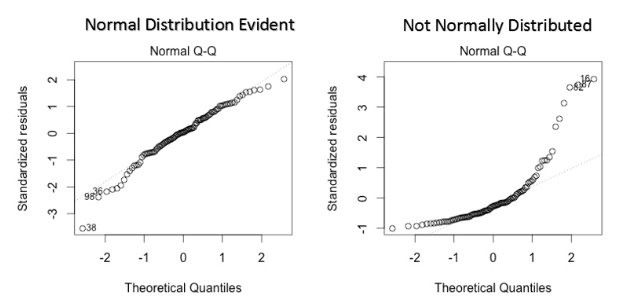

    - Quantile-Quantile (QQ) plot, where we plot standardized error.
        - If errors follow normal distribution N(0,sigma), they should 
          fall on 45degree line.
    - Goodness of fit test, e.g., the Kolmogorov-Smirnov test

4) **Equal variance** (Homoskedasticity)
Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the features and the target) is the same across all values of the independent variables.
    - Scatter plot: observe error (residual) vs predictor values.
 
5) **No or little multicollinearity**
The interpretation of a regression coefficient is that it represents the mean change in the target for each unit change in an feature when you hold all of the other features constant. However, when features are correlated, changes in one feature in turn shifts another feature/features. The stronger the correlation, the more difficult it is to change one feature without changing another. It becomes difficult for the model to estimate the relationship between each feature and the target independently because the features tend to change in unison.
    - Multicollinearity occurs when the independent variables are too highly correlated with each other.
    - Cehck: pair plots and correlation matrix.

In [15]:
model = smf.ols(formula='MEDV~LSTAT', data=housing).fit()

# Here are estimated intercept and slope by least square estimation 
b0_ols = model.params[0]
b1_ols = model.params[1]

housing['BestResponse'] = b0_ols + b1_ols*housing['LSTAT']

### Linearity

Linear regression captures only linear relationship.This can be validated by plotting a scatter plot between the features and the target.

Scatter plot bellow shows a partial linear relationship, although not completely linear.

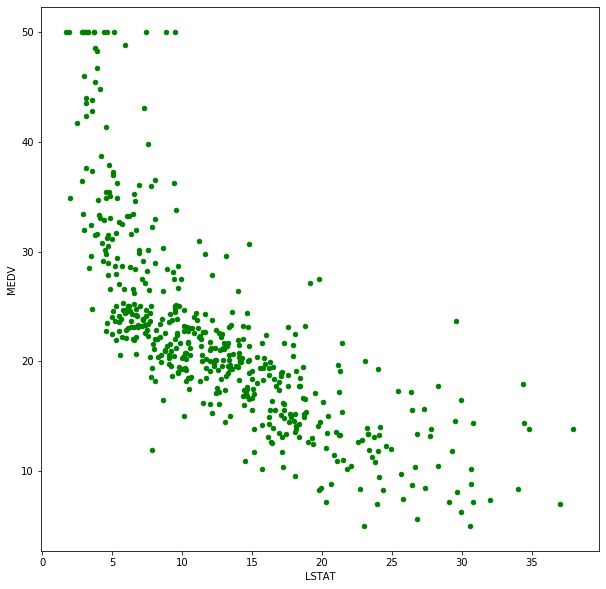

In [16]:
# you can check the scatter plot to have a fast check
housing.plot(kind='scatter', x='LSTAT', y='MEDV', figsize=(10, 10), color='g')

### Independence

Little or No autocorrelation in the residuals.

Autocorrelation occurs when the residual errors are dependent on each other.The presence of correlation in error terms drastically reduces model’s accuracy.This usually occurs in time series models where the next instant is dependent on previous instant.

In [17]:
# Get all errors (residuals)
housing['error'] = housing['MEDV'] - housing['BestResponse']

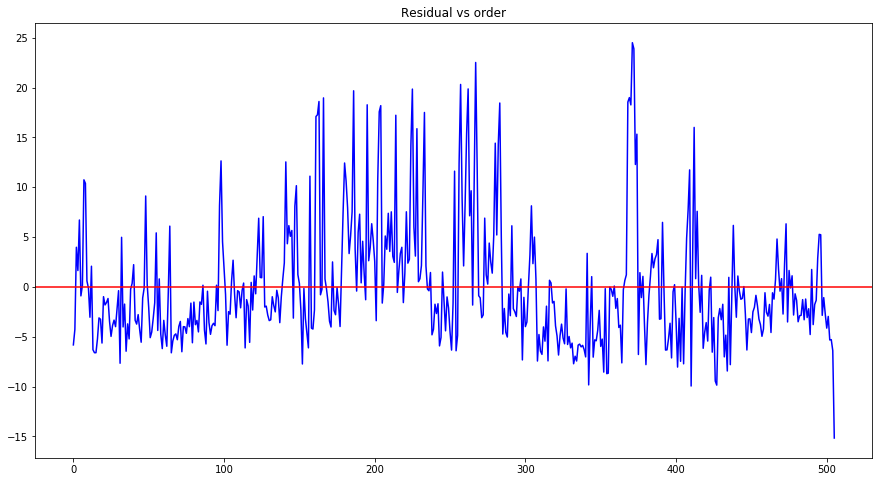

In [18]:
# Method 1: Residual vs order plot
# error vs order plot (Residual vs order) as a fast check 
plt.figure(figsize=(15, 8))
plt.title('Residual vs order')
plt.plot(housing.index, housing['error'], color='blue')
plt.axhline(y=0, color='red')
plt.show()

**Durbin-Watson statistic** will always be between 0 and 4. 

- The closer to 0 the statistic, the more evidence for positive serial correlation. 
- The closer to 4, the more evidence for negative serial correlation.
- The close to 2 (range 1.5 : 2.5), tells us that the residuals are not correlated.

**Here we observe positive serial correlation, assumption is violated**

In [19]:
# Method 2: Durbin Watson Test
# Check the Durbin Watson Statistic
# Rule of thumb: test statistic value in the range of 1.5 to 2.5 are relatively normal
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           5.08e-88
Time:                        17:45:58   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Normality

Using the q-q plot we can infer if the data comes from a normal distribution. If yes, the plot would show fairly straight line. Absence of normality in the errors can be seen with deviation in the straight line.

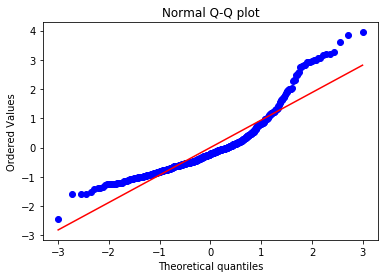

In [20]:
import scipy.stats as stats
z = (housing['error'] - housing['error'].mean())/housing['error'].std(ddof=1)

stats.probplot(z, dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

### Equal variance

We observe specific pattern (bowtie) where the error increases and then decreases with the predicted values violating the constant variance rule. Heteroskedasticity.
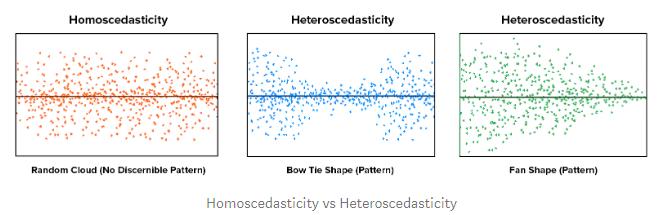
**Assumption is violated**. 

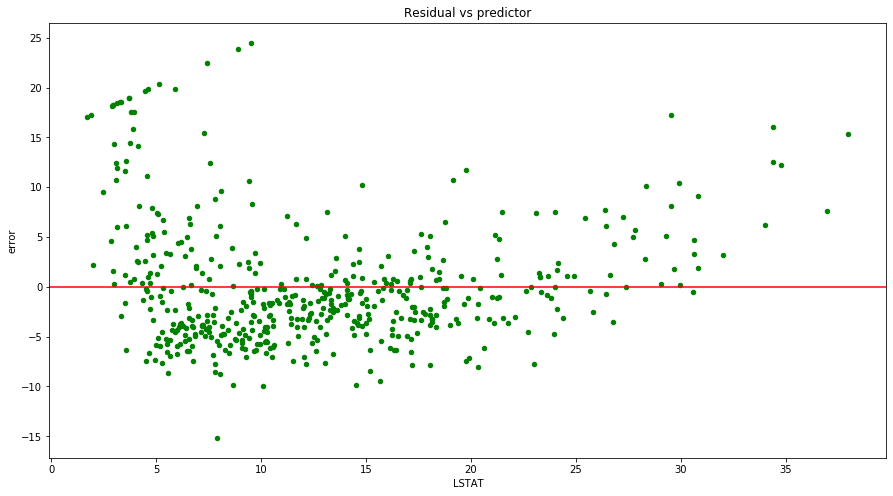

In [21]:
# Residual vs predictor plot
housing.plot(kind='scatter', x='LSTAT', y='error', figsize=(15, 8), color='green')
plt.title('Residual vs predictor')
plt.axhline(y=0, color='red')
plt.show()